# 선형 회귀
---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

## 데이터 준비

In [3]:
num = 51

X = np.linspace(0, 10, num)
y = X + np.random.normal(1, 2, num) #(평균, 표준편자, 개수)

print(X, y)

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ] [ 7.90588298e-03  6.43390605e-01  3.86457702e-01  2.05734742e+00
 -1.60969677e+00 -7.03239633e-01  2.29731294e+00 -4.99433026e-02
  4.22088613e+00  8.95331240e-01  9.66997315e-01  2.21917278e+00
  2.39282027e+00  9.93635487e-01  3.79915860e+00  3.99528341e+00
  3.16725900e+00  4.85602151e+00  4.99417423e+00  5.51654041e+00
  7.47820626e+00  5.77092422e+00  7.27086390e+00  8.91857856e+00
  7.16597329e+00  7.57842979e+00  9.35344775e+00  5.61809931e+00
  4.89494286e+00  7.31197454e+00  8.45226588e+00  1.15656455e+01
  9.67496821e+00  4.97591821e+00  9.66488326e+00  7.24177073e+00
  6.26608837e+00  7.29596828e+00  7.64749508e+00  1.08229469e+01
  1.16879781e+01  7.91492994e+00  9.77952377e+00  1.30159211e+01
  1.18399054e+01  1.09418

<AxesSubplot: >

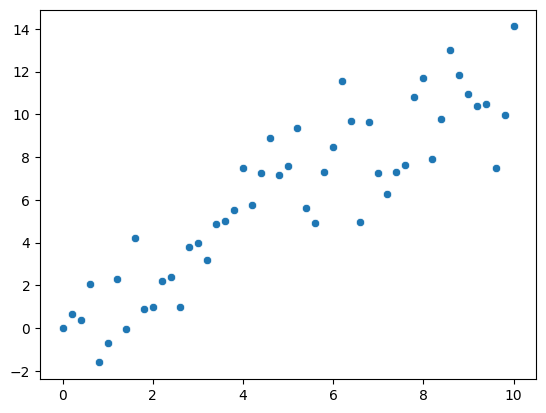

In [4]:
sns.scatterplot(x=X, y=y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2022)

print(X_train.shape, X_test.shape)

(40,) (11,)


In [6]:
X_train[:10]

array([2. , 0.8, 5. , 0. , 6.8, 7.2, 2.6, 2.4, 9.2, 4.4])

In [7]:
X_train = X_train.reshape(-1, 1) #2차원으로 만들어줌
X_train[:5]

array([[2. ],
       [0.8],
       [5. ],
       [0. ],
       [6.8]])

In [8]:
X_train.shape

(40, 1)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) #2차원 이상이 돼야 

LinearRegression()

fit이 됐다 = 그래프에서 직선을 찾았다는 소리 

y = ax + b 에서 a, b 값이 정해졌다


In [10]:
lr.coef_ , lr.intercept_ #기울기 (a), 절편 (b)

(array([1.18944535]), 0.19429492465325282)

In [11]:
y_pred = lr.predict(X_train)
y_pred[:5]

array([2.57318563, 1.14585121, 6.14152168, 0.19429492, 8.28252331])

<AxesSubplot: >

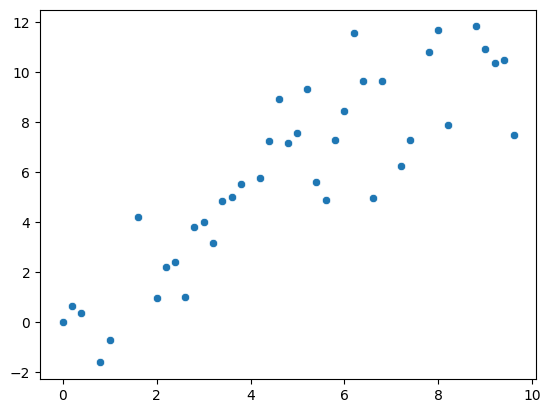

In [12]:
sns.scatterplot(x = X_train.reshape(-1), #다시 1차원으로 바꿈 -> 그래프로 그릴 땐 2차원으로는 힘드니까 
                y = y_train)

우리가 갖고 있는 원래 데이터

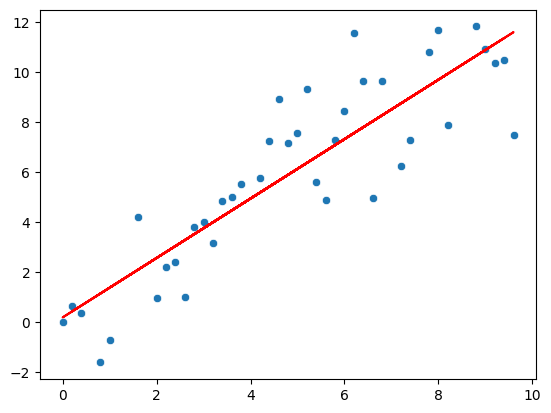

In [13]:
sns.scatterplot(x = X_train.reshape(-1), 
                y = y_train)

plt.plot(X_train.reshape(-1), y_pred, 'r')
plt.show()

빨간 선 = 선형 회귀의 결과

데이터들을 가장 잘 나타내는 선

## 평가 

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#에러의 제곱의 평균
# MSE
mse = mean_squared_error(y_train, y_pred)
mse

3.240801597892171

In [16]:
#RMSE = 루트 MSE
rmse = np.sqrt(mse)
rmse

1.8002226523105889

보통 rmse를 많이 봄

작을 수록 좋은 거 = rmse는 에러이기 때문에


In [18]:
#MAE

mean_absolute_error(y_train, y_pred)

1.4633704275236945

## 테스트

In [19]:
y_pred = lr.predict(X_test.reshape(-1,1))
y_pred

array([12.08874843,  9.23407959, 10.42352494,  0.90796214,  2.33529656,
        1.62162935,  8.52041238, 10.18563587,  1.85951842, 11.85085936,
        4.95207633])

In [20]:
#RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse

(2.956823071167216, 1.719541529352291)

In [22]:
#MAE
mean_absolute_error(y_test, y_pred)

1.5874811828499367

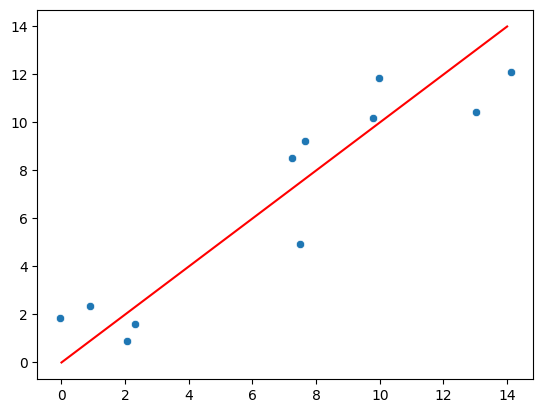

In [26]:
# 시각화
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0,14], [0,14], 'r') #x=y 직선

- x축: 정답 값
- y축: 예측 값

예측이 정답이라면: x=y 직선(빨간 직선) 위에 올라와야 함 (n, n)

빨간 선에서 많이 벗어날 수록 정답과 예측이 많이 벗어났다는 뜻

빨간 선과 일치할수록 잘 맞춘 것